In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [78]:
ticker = yf.Ticker("PLTR")
data = ticker.history(period = "1y")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

In [79]:
#RSI Calculations (14-day)

delta = data['Close'].diff()
gain = delta.clip(lower = 0)
loss = -delta.clip(upper = 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain/avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [80]:
#Moving Averages (50-day)

data['SMA50'] = data['Close'].rolling(window=50).mean()
data['EMA50'] = data['Close'].ewm(span=50, adjust = False).mean()

In [81]:
# MACD (12,26,9)
ema12 = data['Close'].ewm(span=12,adjust=False).mean()
ema26 = data['Close'].ewm(span=26, adjust = False).mean()
data['MACD'] = ema12 - ema26
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust = False).mean()

In [82]:
#Bollinger Bands (20-day, 2 std)
data['BB_Mid'] = data['Close'].rolling(window=20).mean()
rolling_std = data['Close'].rolling(window=20).std()
data['BB_Upper'] = data['BB_Mid'] + 2 * rolling_std
data['BB_Lower'] = data['BB_Mid'] - 2 * rolling_std

In [83]:
latest = data.iloc[-1]
close = latest['Close']

buy_signals = 0
sell_signals = 0

#RSI Signal
if latest['RSI'] < 30:
    buy_signals += 1
elif latest['RSI'] > 70:
    sell_signals += 1

#MACD Signal
if latest['MACD'] > latest['MACD_Signal']:
    buy_signals += 1
else:
    sell_signals += 1

#Trend Signal
if close > latest['SMA50']:
    buy_signals += 1
else:
    sell_signals += 1

#Bollinger signal
if close < latest['BB_Lower']:
    buy_signals += 1
elif close > latest['BB_Upper']:
    sell_signals += 1

#Recommendation
if buy_signals > sell_signals:
    recommendation = "BUY"
elif sell_signals > buy_signals:
    recommendation = "SELL"
else:
    recommendation = "HOLD"

    
print(f"Signals: Buy={buy_signals}, Sell={sell_signals} → Recommendation: {recommendation}")

Signals: Buy=1, Sell=1 → Recommendation: HOLD


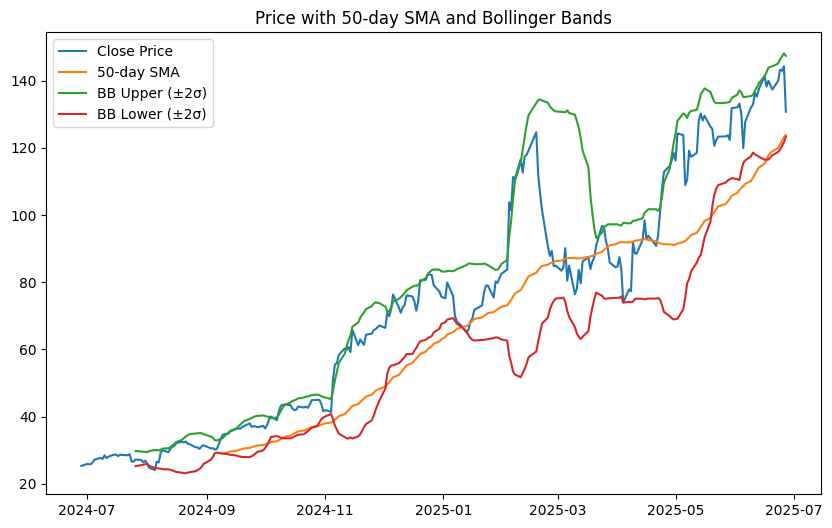

In [84]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label = 'Close Price')
plt.plot(data['SMA50'], label = '50-day SMA')
plt.plot(data['BB_Upper'], label='BB Upper (±2σ)')
plt.plot(data['BB_Lower'], label='BB Lower (±2σ)')
plt.title("Price with 50-day SMA and Bollinger Bands")
plt.legend()
plt.show()